# MSiA422 Java & Python Homework 3
By Lauren Yu

**CONTENT**
- 1.Web API and Weather Data
 - 1.1 Summary table and plot
- 2.Web Scraping with BeautifulSoup
- 3.Extra credit: Scraping all pages

In [112]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [113]:
%pylab inline
matplotlib.style.use('ggplot')
import string, pandas as pd, requests, pyprind
from bs4 import BeautifulSoup

Populating the interactive namespace from numpy and matplotlib


### 1. Web API and Weather Data

From <a href="http://api.wunderground.com/">Wunderground</a> I'm getting historical (July of 2015) data of the following locations: <br />Chicago, New York City, Houston, Seattle and San Francisco.

It queries weather data by zip codes.

In [483]:
mykey='24ba083c675a9b85'
locations=['IL/Chicago','NY/New_York_City','TX/Houston','WA/Seattle','CA/San_Francisco']

def get_weather(apikey,date,location):
    api_url = 'http://api.wunderground.com/api/'
    finalurl = ''.join([api_url,mykey,'/','history_',str(date),'/q/',location,'.json'])
    response = requests.get(finalurl)
    data = response.json() 
    return data

In [485]:
"""This is to make a progress bar for the loop"""
total_len=len(locations)*len(range(20150701, 20150731))
progbar=pyprind.ProgBar(total_len, monitor=True, title='Getting weather data')

"""For each city in locations list and each day in July 2015
I put the query result into a nested dictionary
It will be like allweathers['IL/Chicago']['20150701']=weatherdata"""

allweathers={}
for city in locations:
    allweathers[city]={}
    for date in range(20150701, 20150731):
        progbar.update()
        dayweather=get_weather(mykey,str(date),city)
        allweathers[city][date]=dayweather
        del dayweather

print(progbar)

Getting weather data
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:01:28


Title: Getting weather data
  Started: 01/25/2017 21:28:43
  Finished: 01/25/2017 21:30:11
  Total time elapsed: 00:01:28
  CPU %: 1.40
  Memory %: 1.49


Suppose we are interested in the 5 cities' min/max temperature in each day. Let's save our findings into two separate dataframes. This will make our later tasks (summary table and plot) easier.

In [486]:
""" We only want min/max temperature data from the giant output dictionary
    Then we create a new dictionary based on that.
    Convert dictionary to dataframe. 
    Columns will be each city.
    Rows will be dates.
    Finally we convert all the temperature values into numeric.
    Just in case we get strings or other inconvenient format.
"""
mintemp={city: {date: allweathers[city][date]['history']['dailysummary'][0]['mintempi'] for date in range(20150701, 20150731)} for city in allweathers.keys()}
mintemp=pd.DataFrame.from_dict(mintemp,orient='columns')
mintemp=mintemp.apply(pd.to_numeric, errors='ignore')
mintemp.info()
print('\t')

maxtemp={city: {date: allweathers[city][date]['history']['dailysummary'][0]['maxtempi'] for date in range(20150701, 20150731)} for city in allweathers.keys()}
maxtemp=pd.DataFrame.from_dict(maxtemp,orient='columns')
maxtemp=maxtemp.apply(pd.to_numeric, errors='ignore')
mintemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 20150701 to 20150730
Data columns (total 5 columns):
CA/San_Francisco    30 non-null int64
IL/Chicago          30 non-null int64
NY/New_York_City    30 non-null int64
TX/Houston          30 non-null int64
WA/Seattle          30 non-null int64
dtypes: int64(5)
memory usage: 1.4 KB
	
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 20150701 to 20150730
Data columns (total 5 columns):
CA/San_Francisco    30 non-null int64
IL/Chicago          30 non-null int64
NY/New_York_City    30 non-null int64
TX/Houston          30 non-null int64
WA/Seattle          30 non-null int64
dtypes: int64(5)
memory usage: 1.4 KB


### 2.1 Summary Table and Plots

In [624]:
print('Summary Statistics of Daily Min Temperature')
print('Total Observations:', len(mintemp))
print('\t')
sys.stdout.write("{0:<20}{1:<10}{2:<10}{3:<10}\n".format('Column', "Average", "Max", "Min"))
for col in mintemp.columns.values:
    avg=round(float(mintemp[col].mean()),2)
    maxi=round(float(mintemp[col].max()),2)
    mini=round(float(mintemp[col].min()),2)
    sys.stdout.write("{0:<20}{1:<10}{2:<10}{3:<10}\n".format(col, avg, maxi, mini))

Summary Statistics of Daily Min Temperature
Total Observations: 30
	
Column              Average   Max       Min       
CA/San_Francisco    59.3      63.0      56.0      
IL/Chicago          62.57     73.0      53.0      
NY/New_York_City    71.67     82.0      64.0      
TX/Houston          77.7      80.0      73.0      
WA/Seattle          63.27     69.0      55.0      


In [623]:
print('Summary Statistics of Daily Max Temperature')
print('Total Observations:', len(mintemp))
print('\t')
sys.stdout.write("{0:<20}{1:<10}{2:<10}{3:<10}\n".format('Column', "Average", "Max", "Min"))
for col in maxtemp.columns.values:
    avg=round(float(maxtemp[col].mean()),2)
    maxi=round(float(maxtemp[col].max()),2)
    mini=round(float(maxtemp[col].min()),2)
    #Note that you shouldn't write mean(df[col])
    #Because it will implicitly transform the
    #pandas series into a list, which might not
    #be the most efficient way.
    sys.stdout.write("{0:<20}{1:<10}{2:<10}{3:<10}\n".format(col, avg, maxi, mini))

Summary Statistics of Daily Max Temperature
Total Observations: 30
	
Column              Average   Max       Min       
CA/San_Francisco    74.0      88.0      68.0      
IL/Chicago          81.77     92.0      67.0      
NY/New_York_City    85.8      96.0      75.0      
TX/Houston          96.8      104.0     89.0      
WA/Seattle          83.07     98.0      70.0      


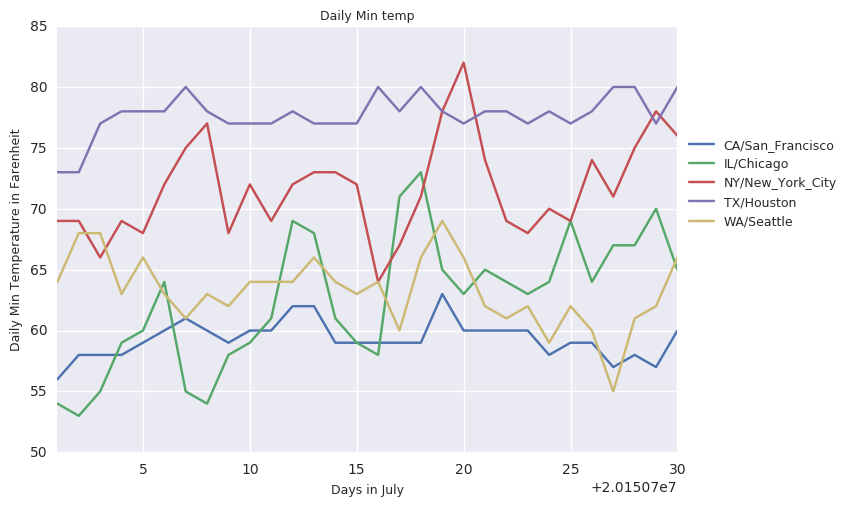

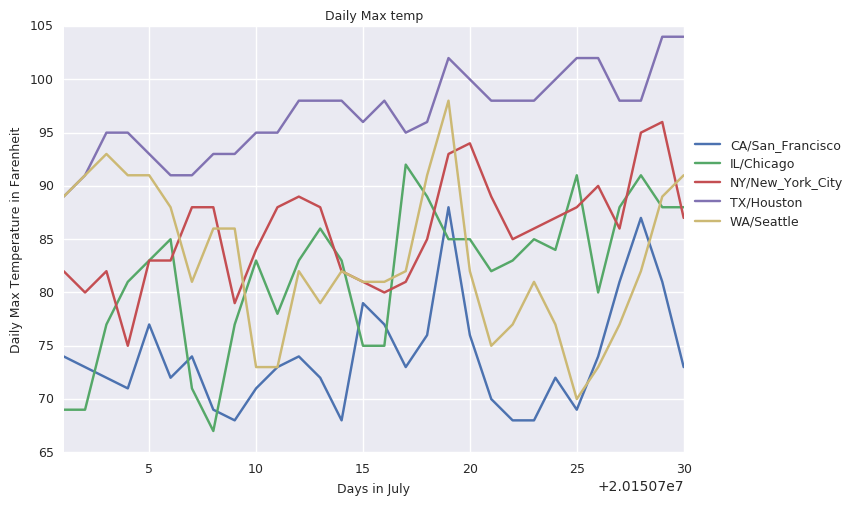

In [625]:
"""Use the plot function in pandas itself"""

para={'fontsize':'9'}
mintemp.plot()
legend(loc='lower left', bbox_to_anchor=(1.0, 0.5), **para)
xlabel('Days in July', **para)
ylabel('Daily Min Temperature in Farenheit',**para)
title('Daily Min temp',**para)

maxtemp.plot(title='Daily max temp', **para)
legend(loc='lower left', bbox_to_anchor=(1.0, 0.5), **para)
xlabel('Days in July', **para)
ylabel('Daily Max Temperature in Farenheit',**para)
title('Daily Max temp',**para)

### 2. Web Scraping with BeautifulSoup
Jail resident data: http://www.showmeboone.com/sheriff/JailResidents/JailResidents.asp

The goal is to:
- Grab all the jail resident demographics data of **the first page**.
- Generate a dataframe.

In [114]:
"""Extract the website. 
   Parse it and get all the clean text of resident info
   Also get column names of the table
   We will need it later for dataframe"""

base_url = 'http://www.showmeboone.com/sheriff/JailResidents/JailResidents.asp'
response = requests.get(base_url)
html = response.content.decode('ascii')
jail_soup = BeautifulSoup(html, 'html.parser')

"""A list of all jail resident info"""
classnames=["one td_left","one td_right","two td_left","two td_right"]
jailbirds=jail_soup.findAll('td', {'class':classnames})
bird_info=[bird.text for bird in jailbirds if bird.text != '\n\xa0Details\n']

In [115]:
"""A list of all attributes"""
attributes=jail_soup.find('tr', id='sort_table_head')
attributes=[att.text for att in attributes.findAll('th')]
attributes=[att.replace('\n\n ','').replace('\n\n','').replace('\xa0','') for att in attributes 
            if att.replace('\n\n ','').replace('\n\n','').replace('\xa0','')!='']
#attributes=[re.sub(r"\n\n |\n\n|\xa0",'',att) for att in attributes if re.sub(r"\n\n |\n\n|\xa0",'',att)!='']
len(bird_info)/8==50 #Make sure we have 50 residents

True

In [116]:
"""bird_info is flat list of all the attributes of residents. 
   Suppose n=# of attributes/column names.
   Thus we select every n-th element of the list
   starting from index 0 to index n.
   Thus we can systematically grab each column.
   And fit it into a dataframe."""

residents=pd.DataFrame()
gap=len(attributes)
for attribute in attributes:
    residents[attribute]=bird_info[attributes.index(attribute)::gap]

In [117]:
print("Number of observations:", len(residents))
residents.head()

Number of observations: 50


,Last Name,First Name,Middle Name,Sex,Race,Age,City,State
0,ALEXANDER,BENJAMIN,FRANKLIN,M,B,22,COLUMBIA,MO
1,ANDERSON,ANDRE,LAMONTE,M,B,30,ST. LOUIS,MO
2,ARTEAGA,BRAYAN,OSIRIS-CACHO,M,H,25,JEFFERSON CITY,MO
3,AUBREY,ASHLEY,SUZANNE,F,B,20,PILOT GROVE,MO
4,AUSTIN,KAY,CEE,F,W,33,KANSAS CITY,MO


### 3. Extra Credit: Scraping all pages
The goal is to:
- Grab all the jail resident demographics data of **all the pages**.
- Generate a dataframe.
- Quickly visualize it using heatmap function in *Seaborn* package.

I noticed that this website uses Java Servlet web application. No matter which page you are at, the url doesn't seem to change. Therefore the implementation in this part is completed with *selenium* package in Python that simulates browser activity on a given webpage. I essentially simulated clicking the "next" button until you can't click anymore.

You will need *selenium* package to run the code below. 
- Documentation of *Selenium*: http://selenium-python.readthedocs.io/
- Documentation of *Seaborn*: http://seaborn.pydata.org/

In [119]:
from selenium import webdriver
import time

"""Webdriver is Chrome because I am using Chrome
   Feel free to change to whatever you have
   
   We browse from page 0 and extract data like we did before.
   Then identify the next button thru xpath.
   Click on it. Go to next page. 
   Rest for 2 seconds. Then repeat.
   We stop at page 4. That is 5 pages in total.
   The final output is again a flat list of all
   resident info. The same transformation applies.
   In the end we will get a dataframe."""

driver = webdriver.Chrome()
driver.get(base_url)

page = 0;
alljailbirds=[]

while page < 5:
    """Current page"""
    print('Currently scraping page:',page)
    
    """Extract data"""
    soup = BeautifulSoup(driver.page_source, "html.parser")
    classnames=["one td_left","one td_right","two td_left","two td_right"]
    jailbirds=soup.findAll('td', {'class':classnames})
    alljailbirds.extend([bird.text for bird in jailbirds if bird.text != '\n\xa0Details\n'])
    
    """Find and click button"""
    path="//html/body/div[@id='mrcMainContent']/form[@id='FORM_I00290']/p/input[3]"
    driver.find_element_by_xpath(path).click()
    
    """Go to next page, repeat"""
    page = page + 1
    time.sleep(2)
    del jailbirds

driver.quit()

Currently scraping page: 0
Currently scraping page: 1
Currently scraping page: 2
Currently scraping page: 3
Currently scraping page: 4


In [108]:
"""Again let's create the dataframe here"""

allresidents=pd.DataFrame()
gap=len(attributes)
for attribute in attributes:
    allresidents[attribute]=alljailbirds[attributes.index(attribute)::gap]

We know for sure there are 217 residents (as of the moment I was doing my homework). Just to be safe, let's check for duplicates. If the total number of rows in our data frame > 217, then we only keep the unique rows.

In [109]:
if len(allresidents)>217:
    allresidents=allresidents[~allresidents.duplicated()]
    print("Number of observations:", len(allresidents))

allresidents.tail() #Starting index=0

,Last Name,First Name,Middle Name,Sex,Race,Age,City,State
207,WRIGHT,ADRIAN,LEWON,M,B,27,COLUMBIA,MO
208,WRIGHT,ROBERT,CARLYLE,M,W,32,COLUMBIA,MO
209,YOUNG,DEMETRIUS,TERRILL,M,B,18,COLUMBIA,MO
210,ZARHOUNI,ASHLEY,MARIE,F,W,25,COLUMBIA,MO
211,ZARHOUNI,DRISS,BURCH,M,H,52,COLUMBIA,MO


Now let's make a heatmap showing the number of jailresidents by race and sex.

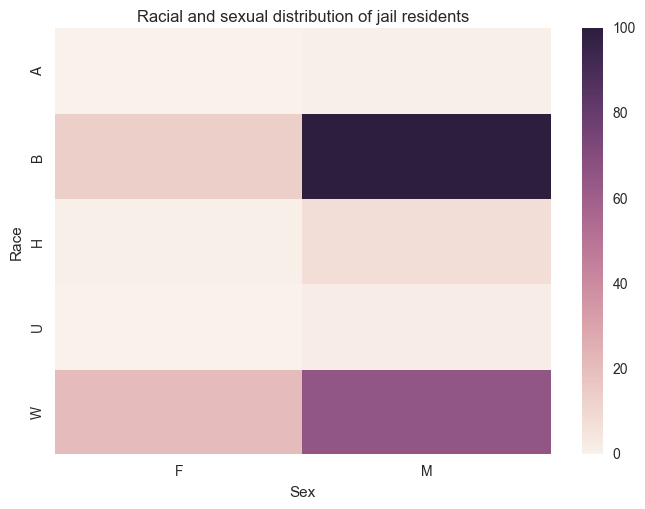

In [110]:
import seaborn as sns
sns.heatmap(allresidents.groupby(['Race','Sex']).size().unstack(fill_value=0))
title('Racial and sexual distribution of jail residents')